In [2]:
!pip install seaborn

In [8]:
# =============================================================
# 📌 NOTEBOOK 4 — Unified Use Case Analysis (Text & Social Media)
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime
import nltk
import warnings
warnings.filterwarnings("ignore")

# Ensure NLTK resources
nltk.download("vader_lexicon")

# -------------------------------------------------------------
# 1. LOAD RAW DATASETS
# -------------------------------------------------------------
tweets = pd.read_csv("./datasets/tweets_sample.csv")
reviews = pd.read_csv("./datasets/reviews_data.csv")
news = pd.read_csv("./datasets/news_headlines.csv")

# Convert dates
tweets["date"] = pd.to_datetime(tweets["date"])
reviews["date"] = pd.to_datetime(reviews["date"])
news["date"] = pd.to_datetime(news["date"])

print("Datasets Loaded:")
print("Tweets:", tweets.shape)
print("Reviews:", reviews.shape)
print("News:", news.shape)

sid = SentimentIntensityAnalyzer()
sns.set(style="whitegrid")


Datasets Loaded:
Tweets: (300, 5)
Reviews: (300, 4)
News: (300, 4)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Abhishekgantana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


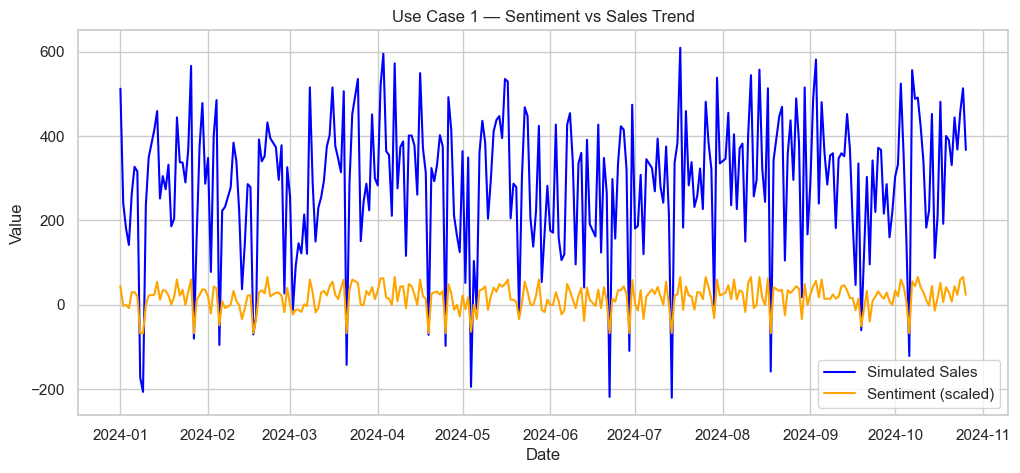

Correlation between sentiment & sales (UC1): 0.94


In [9]:
# =============================================================
# 📌 USE CASE 1 — Product Launch Demand Forecasting
# =============================================================

# Combine sentiment from tweets, reviews, news
tweets["sentiment"] = tweets["tweet_text"].apply(lambda x: sid.polarity_scores(str(x))["compound"])
reviews["sentiment"] = reviews["review_text"].apply(lambda x: sid.polarity_scores(str(x))["compound"])
news["sentiment"] = news["headline"].apply(lambda x: sid.polarity_scores(str(x))["compound"])

# Daily average sentiment
sent_daily = pd.concat([
    tweets[["date", "sentiment"]],
    reviews[["date", "sentiment"]],
    news[["date", "sentiment"]]
]).groupby("date").mean().reset_index()

# Simulated sales based on sentiment
sent_daily["sales"] = (sent_daily["sentiment"] * 500 + np.random.randint(100, 300, len(sent_daily))).round()

# ----------------- Visualization: Sentiment vs Sales -----------------
plt.figure(figsize=(12,5))
plt.plot(sent_daily["date"], sent_daily["sales"], label="Simulated Sales", color="blue")
plt.plot(sent_daily["date"], sent_daily["sentiment"]*100, label="Sentiment (scaled)", color="orange")
plt.title("Use Case 1 — Sentiment vs Sales Trend")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# ----------------- Insight -----------------
corr_uc1 = sent_daily["sales"].corr(sent_daily["sentiment"])
print(f"Correlation between sentiment & sales (UC1): {corr_uc1:.2f}")


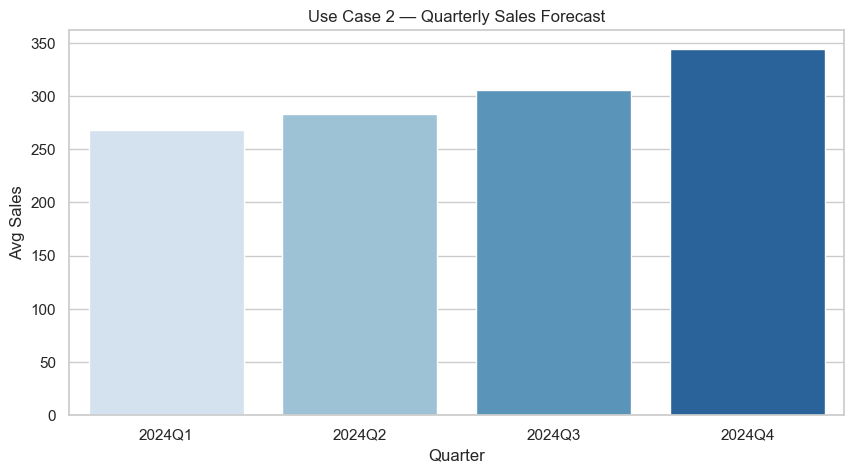

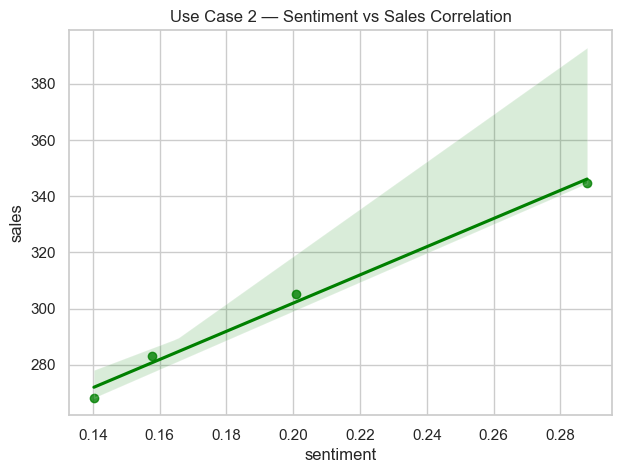

Correlation (UC2): 1.00


In [10]:
# =============================================================
# 📌 USE CASE 2 — Quarterly Earnings Prediction
# =============================================================

sent_daily["quarter"] = sent_daily["date"].dt.to_period("Q")
quarterly = sent_daily.groupby("quarter")[["sentiment", "sales"]].mean().reset_index()

# ---- Visualization 1: Quarterly Sales ----
plt.figure(figsize=(10,5))
sns.barplot(x="quarter", y="sales", data=quarterly, palette="Blues")
plt.title("Use Case 2 — Quarterly Sales Forecast")
plt.xlabel("Quarter")
plt.ylabel("Avg Sales")
plt.show()

# ---- Visualization 2: Sentiment vs Sales ----
plt.figure(figsize=(7,5))
sns.regplot(x="sentiment", y="sales", data=quarterly, color="green")
plt.title("Use Case 2 — Sentiment vs Sales Correlation")
plt.show()

# ---- Insight ----
corr_uc2 = quarterly["sales"].corr(quarterly["sentiment"])
print(f"Correlation (UC2): {corr_uc2:.2f}")


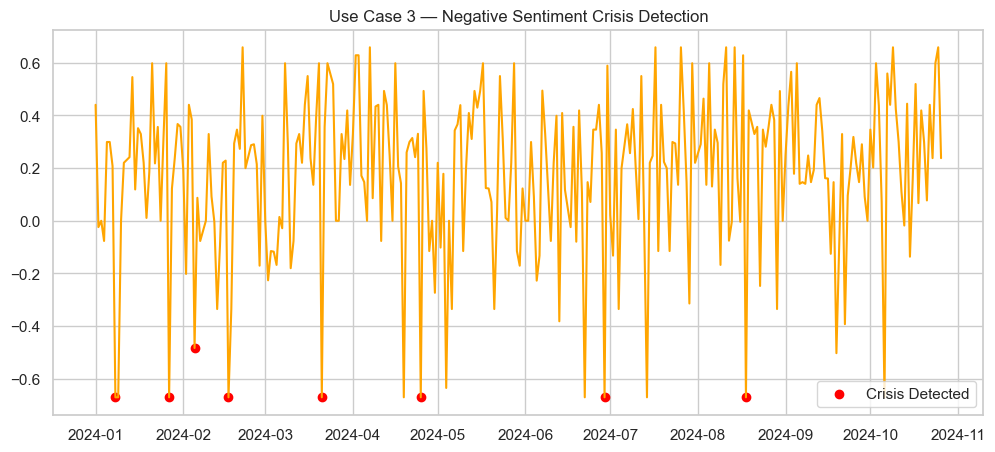

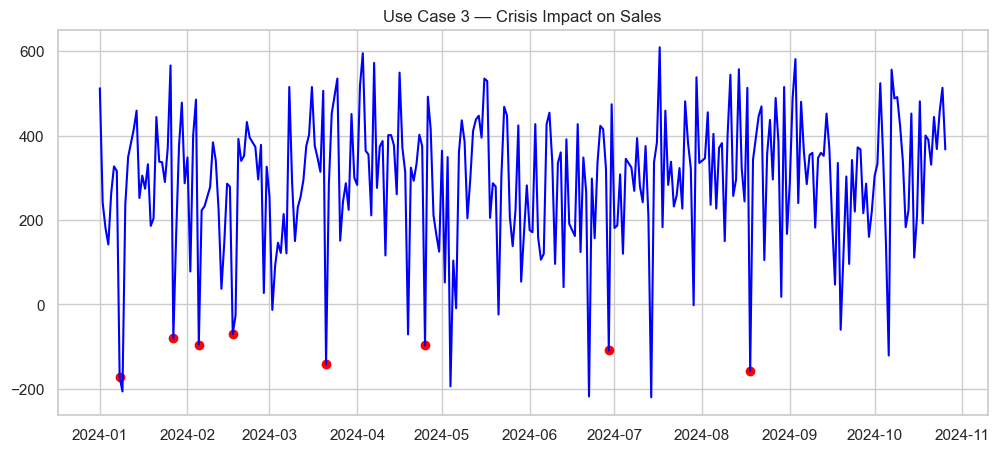

Crises Detected: 8


In [11]:
# =============================================================
# 📌 USE CASE 3 — Crisis Response & Risk Forecasting
# =============================================================

sent_daily["sentiment_change"] = sent_daily["sentiment"].diff()
threshold = sent_daily["sentiment_change"].std() * -2
sent_daily["crisis"] = sent_daily["sentiment_change"] < threshold
crisis_points = sent_daily[sent_daily["crisis"]]

# ---- Visualization: Crisis Detection ----
plt.figure(figsize=(12,5))
plt.plot(sent_daily["date"], sent_daily["sentiment"], color="orange")
plt.scatter(crisis_points["date"], crisis_points["sentiment"], color="red", label="Crisis Detected")
plt.title("Use Case 3 — Negative Sentiment Crisis Detection")
plt.legend()
plt.show()

# ---- Sales impact ----
plt.figure(figsize=(12,5))
plt.plot(sent_daily["date"], sent_daily["sales"], color="blue")
plt.scatter(crisis_points["date"], crisis_points["sales"], color="red")
plt.title("Use Case 3 — Crisis Impact on Sales")
plt.show()

print("Crises Detected:", len(crisis_points))


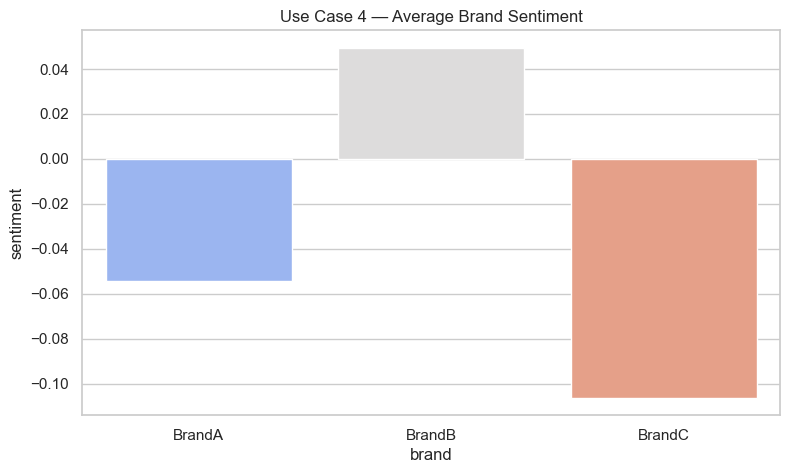

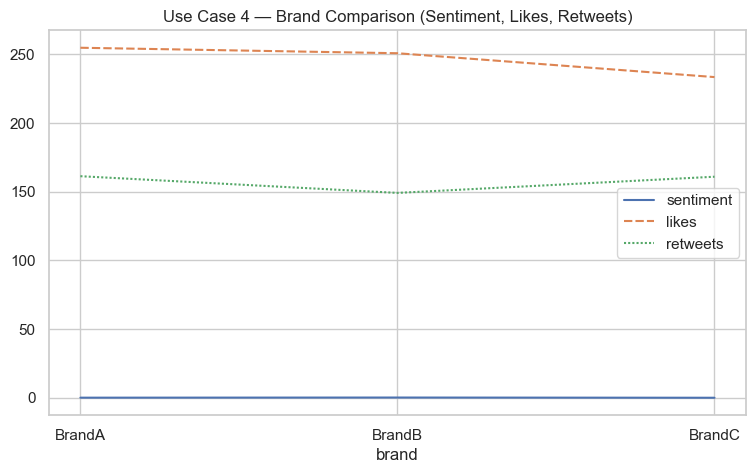

    brand  sentiment       likes    retweets
0  BrandA  -0.054578  254.805825  161.252427
1  BrandB   0.049392  250.814433  149.082474
2  BrandC  -0.106295  233.440000  160.870000


In [12]:
# =============================================================
# 📌 USE CASE 4 — Competitive Intelligence Forecasting
# =============================================================

# Simulate competitor labels
tweets["brand"] = np.random.choice(["BrandA", "BrandB", "BrandC"], len(tweets))

brand_df = tweets.groupby("brand")[["sentiment", "likes", "retweets"]].mean().reset_index()

# ---- Barplot: Brand Sentiment ----
plt.figure(figsize=(9,5))
sns.barplot(x="brand", y="sentiment", data=brand_df, palette="coolwarm")
plt.title("Use Case 4 — Average Brand Sentiment")
plt.show()

# ---- Radar-style plot alternative: Multi-metric brand comparison ----
plt.figure(figsize=(9,5))
sns.lineplot(data=brand_df.set_index("brand"))
plt.title("Use Case 4 — Brand Comparison (Sentiment, Likes, Retweets)")
plt.show()

print(brand_df)


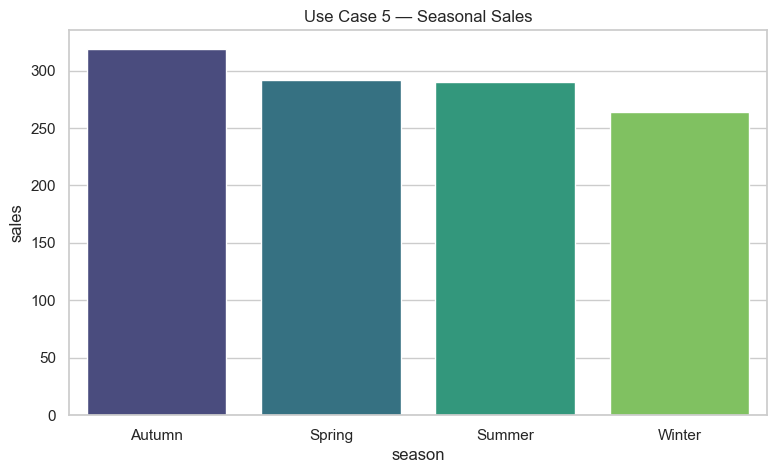

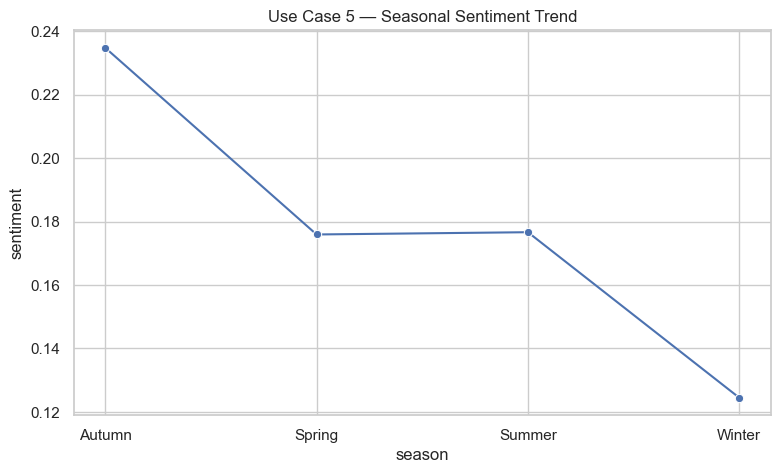

   season  sentiment       sales
0  Autumn   0.234796  319.145455
1  Spring   0.175938  291.736264
2  Summer   0.176650  289.681818
3  Winter   0.124468  263.947368


In [13]:
# =============================================================
# 📌 USE CASE 5 — Seasonal Demand Prediction
# =============================================================

def season(m):
    return "Winter" if m in [12,1,2] else \
           "Spring" if m in [3,4,5] else \
           "Summer" if m in [6,7,8] else "Autumn"

sent_daily["season"] = sent_daily["date"].dt.month.apply(season)
seasonal = sent_daily.groupby("season")[["sentiment", "sales"]].mean().reset_index()

# ---- Visualization 1: Seasonal Sales ----
plt.figure(figsize=(9,5))
sns.barplot(x="season", y="sales", data=seasonal, palette="viridis")
plt.title("Use Case 5 — Seasonal Sales")
plt.show()

# ---- Visualization 2: Seasonal Sentiment ----
plt.figure(figsize=(9,5))
sns.lineplot(x="season", y="sentiment", data=seasonal, marker="o")
plt.title("Use Case 5 — Seasonal Sentiment Trend")
plt.show()

print(seasonal)


In [14]:
# =============================================================
# 📌 FINAL SUMMARY OF ALL FIVE USE CASES
# =============================================================

print("USE CASE SUMMARY")
print("----------------")
print(f"UC1 Sentiment-Sales Correlation: {corr_uc1:.2f}")
print(f"UC2 Quarterly Correlation: {corr_uc2:.2f}")
print(f"UC3 Crisis Events Detected: {len(crisis_points)}")
print("UC4 Brand Comparison Metrics:")
display(brand_df)
print("UC5 Seasonal Demand Matrix:")
display(seasonal)


USE CASE SUMMARY
----------------
UC1 Sentiment-Sales Correlation: 0.94
UC2 Quarterly Correlation: 1.00
UC3 Crisis Events Detected: 8
UC4 Brand Comparison Metrics:


,brand,sentiment,likes,retweets
0,BrandA,-0.054578,254.805825,161.252427
1,BrandB,0.049392,250.814433,149.082474
2,BrandC,-0.106295,233.440000,160.870000


UC5 Seasonal Demand Matrix:


,season,sentiment,sales
0,Autumn,0.234796,319.145455
1,Spring,0.175938,291.736264
2,Summer,0.176650,289.681818
3,Winter,0.124468,263.947368
